Punto 1


In [91]:
#Importar paquetes y lectura de Json

import requests
import random
import numpy as np
import pandas as pd
from sympy import *
import matplotlib.pyplot as plt

r = requests.get( 'https://datahub.io/core/country-list/r/data.json' )
countries = r.json()

In [92]:
#Funciones para elejir un pais al azar 

def getRandomCountry():
  country = []
  country = random.choice(countries)
  name = country['Name']
  re = requests.get('https://inspirehep.net/api/institutions?q=' + name)
  papers = re.json()
  list_institutions = []
  institutions = papers['hits']['hits']
  for element in institutions:
    list_institutions.append({'country': name, 'number_of_papers': element['metadata']['number_of_papers'], 'legacy_ICN': element['metadata']['legacy_ICN'] })
  return list_institutions

def getIcn(countryInstitutions):
  for institution in countryInstitutions:
    if institution['number_of_papers'] > 0:
      return institution['legacy_ICN']
  return getIcn(getRandomCountry())

In [94]:
#Seleccion de autores y lectura de datos

icn = getIcn(getRandomCountry())
icn = icn.replace(' ', '+')
re2 = requests.get('https://inspirehep.net/api/literature?sort=mostrecent&page=1&q=aff+' + icn + '+and+ac+1->+10')
json_data = re2.json()
choice = random.choice(json_data['hits']['hits'])
authorURLs = []

for author in choice['metadata']['authors']:
  if author.get('record') != None:
    authorURLs.append(author['record']['$ref'])

In [95]:
#Recoleccion de datos y construccion de la tabla

def filter_info (data,field):
  value = 'Sin datos'
  val_to_check = data.get(field)
  if type(val_to_check) == list and len(val_to_check) > 0: 
    val_to_check = val_to_check[0]
  if val_to_check != None:
    value = val_to_check['value']
  return value

authorInfoList = []
i = 0
for authorUrl in authorURLs:
  i = i+1
  data = requests.get(authorUrl).json()['metadata']
  if data.get('positions') != None:
    if data['positions'][0].get('institution') != None:
      institution = data['positions'][0]['institution']
    else:
      institution = 'Sin datos'
    if data['positions'][0].get('start_date') != None:
      s_date = data['positions'][0]['start_date']
    else:
      s_date = 'Sin datos'
    if data['positions'][0].get('end_date') != None:
      e_date = data['positions'][0]['end_date']
    else:
      e_date = 'Sin datos'
    if data['positions'][0].get('rank') != None:
      rank = data['positions'][0]['rank']
    else:
      rank = 'Sin datos'
  else:
    rank = 'Sin datos'
    institution = 'Sin datos'
    s_date = 'Sin datos'
    e_date = 'Sin datos'
  authorInfoList.append(
      {
       'Autor':i,
       'Nombre completo': filter_info(data, 'name'),
       'Correo electronico': filter_info(data, 'email_addresses'),
       'Rango de la ultima posicion': rank,
       'Institucion de la ultima posicion': institution,
       'Fecha de inicio de la ultima posicion': s_date,
       'Fecha de finalizacion de la ultima posicion': e_date,
      }
  )

pd.DataFrame(authorInfoList)

,Autor,Nombre completo,Correo electronico,Rango de la ultima posicion,Institucion de la ultima posicion,Fecha de inicio de la ultima posicion,Fecha de finalizacion de la ultima posicion
0,1,"Setiawan, Agung Mulyo",agung.mulyo.fmipa@um.ac.id,SENIOR,"Negeri U., Malang",2018,Sin datos
1,2,"Sulaksono, Anto",anto@fisika.ui.ac.id,UNDERGRADUATE,Indonesia U.,Sin datos,Sin datos


Punto 2

In [104]:
#Creacion del polinomio

def numero ():
 return random.randint(4,7)

x = Symbol('x')
A = numero()
B = numero()
C = numero()

roots = (A-x)*(B-x)*(C-x)
y = (A*B*C)-(A*C*x)-(B*C*x)+(C*x*x)-(A*B*x)+(A*x*x)+(B*x*x)-(x*x*x)

In [105]:
#Raices de la derivada
dy = y.diff(x)
roots_dy = solve(dy)

In [106]:
#Minimo y maximo de la funcion
d2y = diff(y, x, 2)

A1 = d2y.subs(x,roots_dy[0])
A2 = d2y.subs(x,roots_dy[1])

B1 = y.subs(x,roots_dy[0])
B2 = y.subs(x,roots_dy[1])
B = [B1, B2]

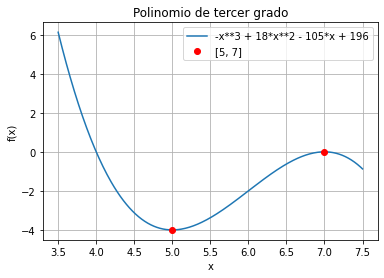

In [107]:
#Grafica
line, = plot(y, (x, 3.5, 7.5), show=False)
x1, y1 = line.get_points()

plt.title('Polinomio de tercer grado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x1, y1, label=y)
plt.plot(roots_dy, B,'o', color='red', label=roots_dy)

plt.legend()
plt.grid()
plt.show()

